In [152]:
using LinearAlgebra
using Plots
using DelimitedFiles
t = 3.2
delta = 9
Ucf = 10.2
smalldelta = 0.5


0.5

In [153]:
Hg =  [
   0 t
   t delta ]

2×2 Matrix{Float64}:
 0.0  3.2
 3.2  9.0

In [154]:
Hf =  [
   0 t
   t delta - Ucf  ]

2×2 Matrix{Float64}:
 0.0   3.2
 3.2  -1.2

In [155]:
Eg,Vg = eigen(Hg)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -1.0217750769114093
 10.02177507691141
vectors:
2×2 Matrix{Float64}:
 -0.952616  0.304175
  0.304175  0.952616

In [156]:
Ef,Vf = eigen(Hf)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
2-element Vector{Float64}:
 -3.855764119219941
  2.655764119219942
vectors:
2×2 Matrix{Float64}:
 -0.638636  -0.769509
  0.769509  -0.638636

In [157]:
function F1(Eg,Vg,Ef,Vf,Eb)
   return ((abs(dot(Vg[:,1],Vf[:,1])))^2)/(Eb+Eg-Ef+im*smalldelta)
end

F1 (generic function with 1 method)

In [158]:
function F2(Eg,Vg,Ef,Vf,Eb)
    return ((abs(dot(Vg[:,1],Vf[:,2])))^2)/(Eb+Eg-Ef+im*smalldelta)
 end

F2 (generic function with 1 method)

In [159]:
fp = open("xpsoutput.dat","w")
for Eb in -10:0.001:10
    ints = (-1/pi)imag( F1(Eg[1],Vg,Ef[1],Vf,Eb)+ F2(Eg[1],Vg,Ef[2],Vf,Eb))
    println(fp,Eb,",",ints)
end
close(fp)

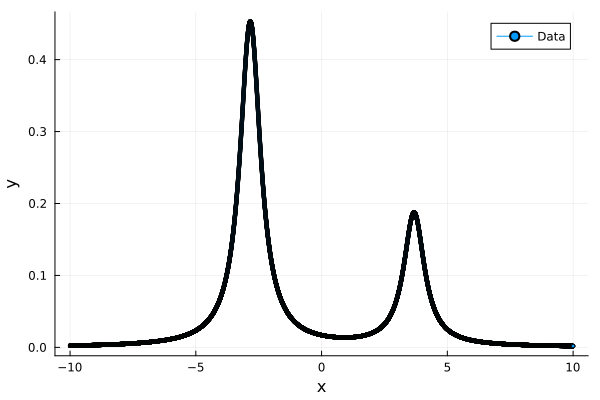

In [160]:
# ファイルを読み取り
data = readdlm("xpsoutput.dat",',')

# データを x と y に分割
x = data[:, 1]
y = data[:, 2]

# サイズの変更
x = x[:]
y = y[:]

# プロットを作成
plot(x, y, xlabel="x", ylabel="y", label="Data", marker=:circle, markersize=2)
